<a href="https://colab.research.google.com/github/Innocente001/Innocente001/blob/main/consommation_energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### STOCKAGE DONNEES

In [ ]:
# env Python
# import urllib library
from urllib.request import urlopen
import urllib.request as request 
import urllib.parse 
from datetime import datetime, timezone,timedelta
# from  datetime import timedelta 
# import pandas as pd
# from pandas import json_normalize

# import mysql.connector
# import json
import json


#variable requete
rows=10000
start='0'
dataset='eco2mix-metropoles-tr'
timezone='Europe/Berlin'
format='json'
sort='-date_heure'
frequence = 24



#mysql variable
# user='root'
# password='root'
# host='127.0.0.1'
# database='consommation'
# table='energy'


#mssql variables
import pyodbc 
server = 'LAPTOP-DA94BCE0\SQLEXPRESS' 
database = 'consommation' 
username = 'sa' 
password = 'a' 
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';Trusted_Connection=yes;')

now  = datetime.now()
previous_hour = now - timedelta(hours=frequence)
base_url ='https://opendata.reseaux-energies.fr/api/records/1.0/search/?'

params  = {
            'dataset':dataset,
            'q':('date_heure>='+'\"'+(previous_hour.strftime("%Y-%m-%dT%H:%M:00Z"))+'\"'),
            'sort':'-date_heure',
            'rows':rows,
            # 'start':start,
            'format':'json',
            'timezone':'Europe/Berlin'
            }

query_url = base_url+urllib.parse.urlencode(params)
print(query_url)

# store the response of URL
# with request.urlopen('https://opendata.reseaux-energies.fr/api/records/1.0/search/?dataset=eco2mix-metropoles-tr&q=date_heure%3E%3D%222022-05-14T23%3A00%3A00Z%22&rows=50&sort=-date_heure&timezone=Europe%2FBerlin') as response:
with request.urlopen(query_url) as response:
    if response.getcode()==200:
        #Creating a cursor object using the cursor() method
       
        source = response.read()
        data = json.loads(source)
        cursor = cnxn.cursor()
        for d in data['records']:
            if 'consommation' in d['fields']:
                # print(d['fields']['heures'])
                date =d['fields']['date']
                consommation=d['fields']['consommation']
                heures=d['fields']['heures']
                libelle_metropole=d['fields']['libelle_metropole']
                echanges_physiques=d['fields']['echanges_physiques']
                # cursor = conn.cursor()
                try:
                    # count = cursor.execute("""INSERT INTO energy(echanges_physiques, date_valeur, consommation, heures, libelle_metropole) VALUES(?,?,?,?,?)""",
                    count = cursor.execute("""INSERT INTO energy(libelle_metropole,date_valeur,consommation,echanges_physiques,heures) VALUES(?,?,?,?,?)""",
                     libelle_metropole,date,consommation,echanges_physiques,heures).rowcount
                    
                    cnxn.commit()
               

                except:
                    # Rolling back in case of error
                    cnxn.rollback()

                    print("Data not inserted")

                    # Closing the connection
                    cnxn.close()
                    break
            else:
                print('no data')
        # cnxn.close()
    else:
        print("erreur dans le chargement")
# dataset=eco2mix-metropoles-tr&q=date_heure%3E%3D%222022-05-14T23%3A00%3A00Z%22&rows=8&sort=-date_heure&timezone=Europe%2FBerlin 

https://opendata.reseaux-energies.fr/api/records/1.0/search/?dataset=eco2mix-metropoles-tr&q=date_heure%3E%3D%222022-05-21T15%3A50%3A00Z%22&sort=-date_heure&rows=10000&format=json&timezone=Europe%2FBerlin
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no data
no 

### LECTURE DES DONNEES

In [ ]:
import pyodbc
import pandas as pd

server = 'LAPTOP-DA94BCE0\SQLEXPRESS' 
database = 'consommation' 
username = 'sa' 
password = 'a' 
cnxn = pyodbc.connect('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';Trusted_Connection=yes;')

sql = "Select * from energy"
data = pd.read_sql(sql,cnxn)

In [ ]:
data.head() # affichage du contenu de la table

,libelle_metropole,id,date_valeur,consommation,echanges_physiques,heures
0,Métropole du Grand Paris,1,2022-05-18,4122.0,4078.0,15:30
1,Métropole Européenne de Lille,2,2022-05-18,896.0,692.0,15:30
2,Eurométropole de Strasbourg,3,2022-05-18,723.0,320.0,15:30
3,Métropole du Grand Nancy,4,2022-05-18,183.0,181.0,15:30
4,Métropole Nice Côte d'Azur,5,2022-05-18,183.0,83.0,15:30


In [ ]:
data.shape # 1402 lignes et 6 colonnes dans notre jeu de données

(1402, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1402 entries, 0 to 1401
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   libelle_metropole   1402 non-null   object 
 1   id                  1402 non-null   int64  
 2   date_valeur         1402 non-null   object 
 3   consommation        1402 non-null   float64
 4   echanges_physiques  1402 non-null   float64
 5   heures              1402 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 65.8+ KB


In [ ]:
data.describe() # stats desc sur les variables

,id,consommation,echanges_physiques
count,4535.000000,4535.000000,4535.000000
mean,2268.000000,488.020507,395.089085
std,1309.286065,707.472653,669.914688
min,1.000000,58.000000,-25.000000
25%,1134.500000,162.000000,147.000000
50%,2268.000000,245.000000,204.000000
75%,3401.500000,408.500000,330.000000
max,4535.000000,4237.000000,4200.000000


In [ ]:
data.isna().sum() # pas de valeurs manquantes au niveau du jeu de données

libelle_metropole     0
id                    0
date_valeur           0
consommation          0
echanges_physiques    0
heures                0
dtype: int64

In [ ]:
data.drop_duplicates() ### Absence de doublons

,libelle_metropole,id,date_valeur,consommation,echanges_physiques,heures
0,Métropole du Grand Paris,1,2022-05-18,4122.0,4078.0,15:30
1,Métropole Européenne de Lille,2,2022-05-18,896.0,692.0,15:30
2,Eurométropole de Strasbourg,3,2022-05-18,723.0,320.0,15:30
3,Métropole du Grand Nancy,4,2022-05-18,183.0,181.0,15:30
4,Métropole Nice Côte d'Azur,5,2022-05-18,183.0,83.0,15:30
...,...,...,...,...,...,...
4530,Métropole Grenoble-Alpes-Métropole,4531,2022-05-22,343.0,219.0,12:00
4531,Métropole Toulon-Provence-Méditerranée,4532,2022-05-22,201.0,172.0,12:00
4532,Métropole du Grand Paris,4533,2022-05-22,3398.0,3344.0,12:00
4533,Métropole Rouen Normandie,4534,2022-05-22,311.0,262.0,12:00


In [ ]:
data['libelle_metropole'].unique # affichage de tous les métropoles

<bound method Series.unique of 0                     Métropole du Grand Paris
1                Métropole Européenne de Lille
2                  Eurométropole de Strasbourg
3                     Métropole du Grand Nancy
4                   Métropole Nice Côte d'Azur
                         ...                  
4530        Métropole Grenoble-Alpes-Métropole
4531    Métropole Toulon-Provence-Méditerranée
4532                  Métropole du Grand Paris
4533                 Métropole Rouen Normandie
4534                        Toulouse Métropole
Name: libelle_metropole, Length: 4535, dtype: object>

In [ ]:
data.corr() # corrélation

,id,consommation,echanges_physiques
id,1.000000,-0.070113,-0.068366
consommation,-0.070113,1.000000,0.951328
echanges_physiques,-0.068366,0.951328,1.000000


### CREATIONS GRAPHIQUES

In [ ]:
# librairies spécifiques (préparation à la modélisation)

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

from functools import reduce
import pylab
import scipy.stats as scp

from sklearn import linear_model
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

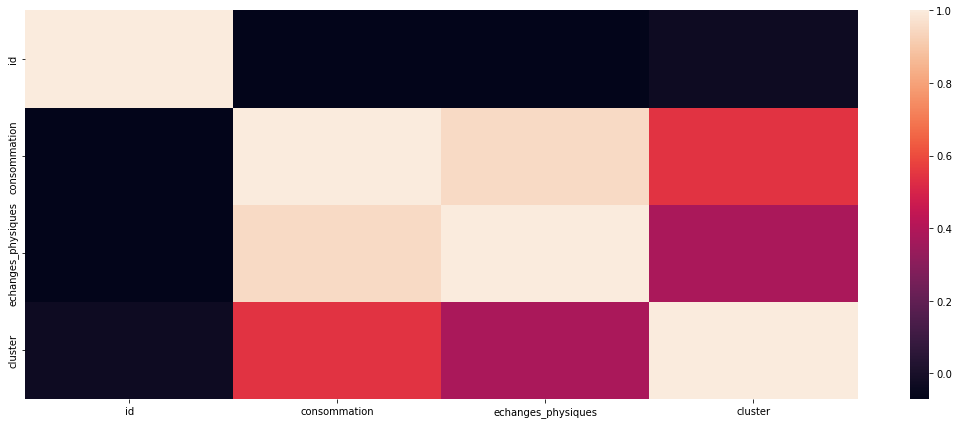

In [ ]:
# réalisation d'une heat map : 
plt.figure(figsize=(15,6))
sns.heatmap(data.corr())
plt.show()

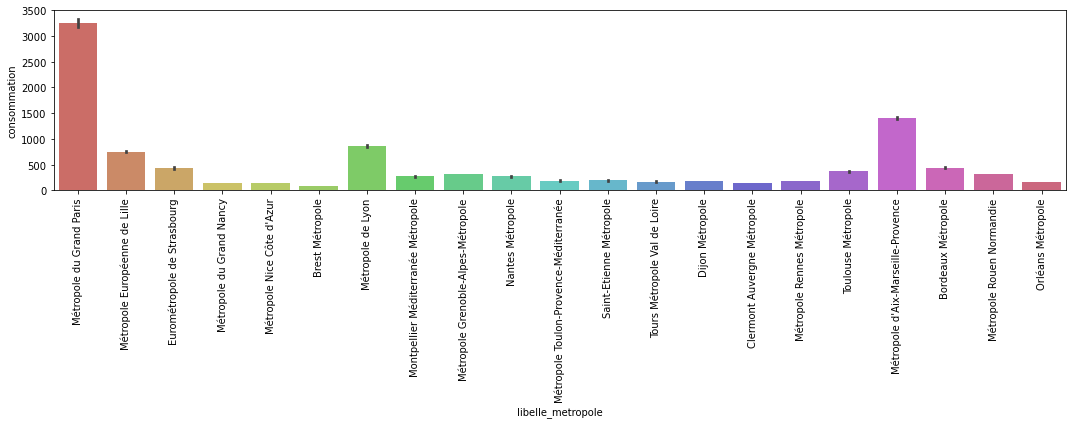

In [ ]:
# La consommation d'électricité par métropoles françaises
plt.figure(figsize=(15,6))
sns.barplot(x = 'libelle_metropole', y = 'consommation', data = data, palette='hls')
plt.xticks(rotation = 90)
plt.show()
# La métropole de Paris avec la consommation la plus élevée suivi de celle d'Aix-Marseille-Provence et Lyon

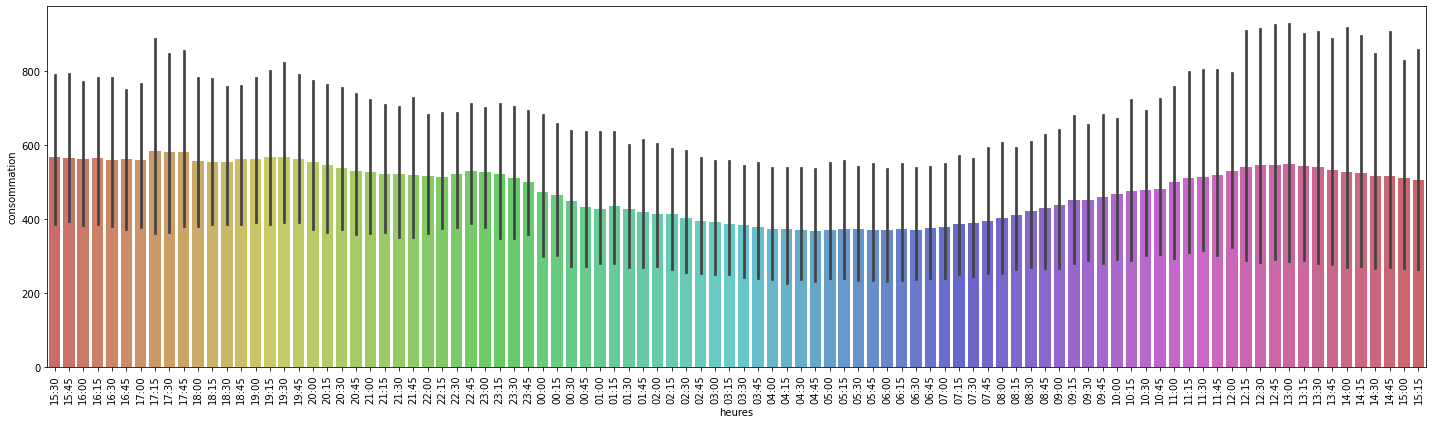

In [ ]:
# La consommation d'électricité des métropoles par heures
plt.figure(figsize=(20,6))
sns.barplot(x = 'heures', y = 'consommation', data = data, palette='hls')
plt.xticks(rotation = 90)
plt.show()

### MODELE D'APPRENTISSAGE SUPERVISEE : LA REGRESSION LINEAIRE 

In [ ]:
import seaborn as sns ### Package graphique
# allow plots to appear within the notebook
%matplotlib inline

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4535 entries, 0 to 4534
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   libelle_metropole   4535 non-null   object 
 1   id                  4535 non-null   int64  
 2   date_valeur         4535 non-null   object 
 3   consommation        4535 non-null   float64
 4   echanges_physiques  4535 non-null   float64
 5   heures              4535 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 212.7+ KB


<AxesSubplot:xlabel='echanges_physiques', ylabel='consommation'>

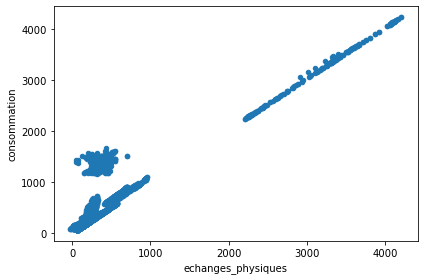

In [ ]:
data.plot("echanges_physiques", "consommation", kind = "scatter") # nuage de points

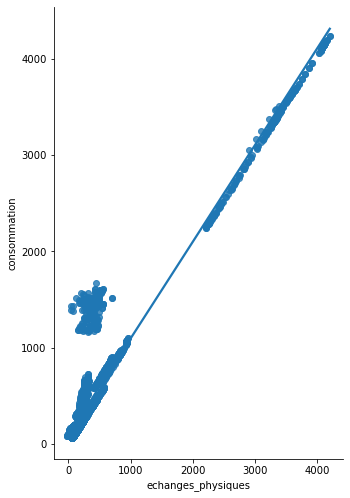

In [ ]:
# Visualisation avec l'ajout de la droite de régression
sns.pairplot(data, x_vars=['echanges_physiques'], y_vars='consommation', size=7, aspect=0.7, kind='reg') 
# Argument (données, prédictrices, target)

### Relation croissante entre les deux variables

In [ ]:
# les métropoles avec des consommations > 1000
data1= data[data["consommation"] > 1000]
data1

,libelle_metropole,id,date_valeur,consommation,echanges_physiques,heures
0,Métropole du Grand Paris,1,2022-05-18,4122.0,4078.0,15:30
6,Métropole de Lyon,7,2022-05-18,1095.0,955.0,15:30
17,Métropole d'Aix-Marseille-Provence,18,2022-05-18,1519.0,394.0,15:30
28,Métropole du Grand Paris,29,2022-05-18,4132.0,4090.0,15:45
33,Métropole de Lyon,34,2022-05-18,1080.0,942.0,15:45
...,...,...,...,...,...,...
4460,Métropole du Grand Paris,4461,2022-05-22,3204.0,3161.0,11:00
4479,Métropole du Grand Paris,4480,2022-05-22,3287.0,3242.0,11:15
4497,Métropole du Grand Paris,4498,2022-05-22,3310.0,3267.0,11:30
4514,Métropole du Grand Paris,4515,2022-05-22,3347.0,3299.0,11:45


In [ ]:
# les métropoles avec des consommations < 2000
data2= data1[data1["consommation"] < 2000]
data2

,libelle_metropole,id,date_valeur,consommation,echanges_physiques,heures
6,Métropole de Lyon,7,2022-05-18,1095.0,955.0,15:30
17,Métropole d'Aix-Marseille-Provence,18,2022-05-18,1519.0,394.0,15:30
33,Métropole de Lyon,34,2022-05-18,1080.0,942.0,15:45
38,Métropole d'Aix-Marseille-Provence,39,2022-05-18,1509.0,370.0,15:45
43,Métropole de Lyon,44,2022-05-18,1066.0,930.0,16:00
...,...,...,...,...,...,...
4365,Métropole d'Aix-Marseille-Provence,4366,2022-05-22,1314.0,362.0,09:45
4390,Métropole d'Aix-Marseille-Provence,4391,2022-05-22,1297.0,304.0,10:00
4404,Métropole d'Aix-Marseille-Provence,4405,2022-05-22,1317.0,323.0,10:15
4425,Métropole d'Aix-Marseille-Provence,4426,2022-05-22,1321.0,328.0,10:30


<AxesSubplot:xlabel='echanges_physiques', ylabel='consommation'>

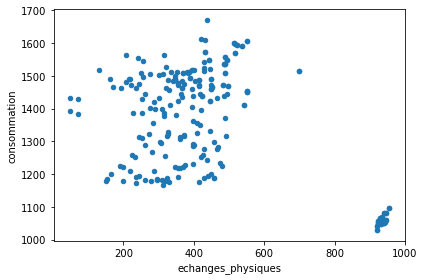

In [ ]:
data2.plot("echanges_physiques", "consommation", kind = "scatter") # nuage de points

In [ ]:
# Non sélection des outliers (consommation < 1100 à exclure) => se trouvant au niveau de la droite de régression
data3= data2[data2["consommation"] > 1100]
data3

,libelle_metropole,id,date_valeur,consommation,echanges_physiques,heures
17,Métropole d'Aix-Marseille-Provence,18,2022-05-18,1519.0,394.0,15:30
38,Métropole d'Aix-Marseille-Provence,39,2022-05-18,1509.0,370.0,15:45
46,Métropole d'Aix-Marseille-Provence,47,2022-05-18,1490.0,347.0,16:00
75,Métropole d'Aix-Marseille-Provence,76,2022-05-18,1478.0,356.0,16:15
85,Métropole d'Aix-Marseille-Provence,86,2022-05-18,1513.0,387.0,16:30
...,...,...,...,...,...,...
4365,Métropole d'Aix-Marseille-Provence,4366,2022-05-22,1314.0,362.0,09:45
4390,Métropole d'Aix-Marseille-Provence,4391,2022-05-22,1297.0,304.0,10:00
4404,Métropole d'Aix-Marseille-Provence,4405,2022-05-22,1317.0,323.0,10:15
4425,Métropole d'Aix-Marseille-Provence,4426,2022-05-22,1321.0,328.0,10:30


<AxesSubplot:xlabel='echanges_physiques', ylabel='consommation'>

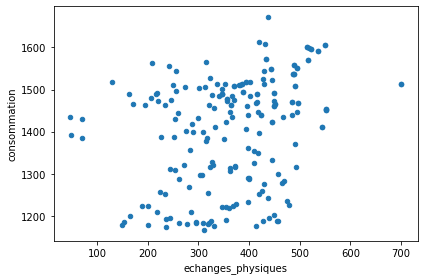

In [ ]:
data3.plot("echanges_physiques", "consommation", kind = "scatter") # nuage de points

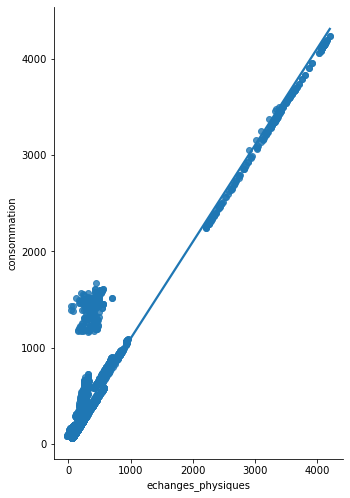

In [ ]:
# Visualisation avec l'ajout de la droite de régression
sns.pairplot(data, x_vars=['echanges_physiques'], y_vars='consommation', size=7, aspect=0.7, kind='reg') 
# Argument (données, prédictrices, target)

In [ ]:
# Séparer les variables associées au clustering des autres - Numpy array

X = data[["echanges_physiques", "consommation"]].values
X[0:3]

array([[4078., 4122.],
       [ 692.,  896.],
       [ 320.,  723.]])

In [ ]:
clustering_score = []
for i in range(1, 11): ##### On fait varier le nombre de cluster entre 1 et 10
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    clustering_score.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.

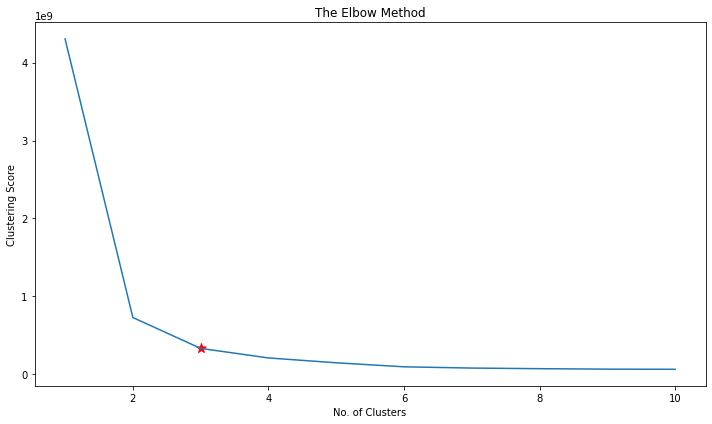

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), clustering_score)
plt.scatter(3,clustering_score[2], s = 100, c = 'red', marker='*') #### Nombre de K optimal
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show() ## Nombre de cluster optimal K = 3

In [ ]:
kmeans= KMeans(n_clusters = 3, random_state = 1) ### Etape 1: Appel de la fonction KMEANS

# Compute k-means clustering
kmeans.fit(X) ##### Etape 2: Lancement du modèle: construction cluster

# Compute cluster centers and predict cluster index for each sample.
pred = kmeans.predict(X) ##### Etape 3: Attribution - Affecter à chaque observation, un groupe parmi les 5 définies
pred ##### Catégorie déterminée par KMeans

array([1, 2, 2, ..., 1, 0, 0])

In [ ]:
data["cluster"] = pred
data

,libelle_metropole,id,date_valeur,consommation,echanges_physiques,heures,cluster
0,Métropole du Grand Paris,1,2022-05-18,4122.0,4078.0,15:30,1
1,Métropole Européenne de Lille,2,2022-05-18,896.0,692.0,15:30,2
2,Eurométropole de Strasbourg,3,2022-05-18,723.0,320.0,15:30,2
3,Métropole du Grand Nancy,4,2022-05-18,183.0,181.0,15:30,0
4,Métropole Nice Côte d'Azur,5,2022-05-18,183.0,83.0,15:30,0
...,...,...,...,...,...,...,...
4530,Métropole Grenoble-Alpes-Métropole,4531,2022-05-22,343.0,219.0,12:00,0
4531,Métropole Toulon-Provence-Méditerranée,4532,2022-05-22,201.0,172.0,12:00,0
4532,Métropole du Grand Paris,4533,2022-05-22,3398.0,3344.0,12:00,1
4533,Métropole Rouen Normandie,4534,2022-05-22,311.0,262.0,12:00,0


In [ ]:
### Etude du cluster 0 :
data[data["cluster"] == 0]

,libelle_metropole,id,date_valeur,consommation,echanges_physiques,heures,cluster
3,Métropole du Grand Nancy,4,2022-05-18,183.0,181.0,15:30,0
4,Métropole Nice Côte d'Azur,5,2022-05-18,183.0,83.0,15:30,0
5,Brest Métropole,6,2022-05-18,79.0,78.0,15:30,0
7,Montpellier Méditerranée Métropole,8,2022-05-18,308.0,270.0,15:30,0
8,Métropole Grenoble-Alpes-Métropole,9,2022-05-18,359.0,253.0,15:30,0
...,...,...,...,...,...,...,...
4529,Orléans Métropole,4530,2022-05-22,154.0,135.0,12:00,0
4530,Métropole Grenoble-Alpes-Métropole,4531,2022-05-22,343.0,219.0,12:00,0
4531,Métropole Toulon-Provence-Méditerranée,4532,2022-05-22,201.0,172.0,12:00,0
4533,Métropole Rouen Normandie,4534,2022-05-22,311.0,262.0,12:00,0


In [ ]:
data[data["cluster"] == 0].consommation.mean() #### ce groupe consomme 228 en moyenne

228.75124378109453

In [ ]:
data[data["cluster"] == 0]["echanges_physiques"].mean()  #### 193 échanges physiques en moyenne

193.93698175787728

In [ ]:
data[data["cluster"] == 0].groupby("libelle_metropole").size()  

libelle_metropole
Bordeaux Métropole                        165
Brest Métropole                           207
Clermont Auvergne Métropole               207
Dijon Métropole                           207
Eurométropole de Strasbourg               197
Montpellier Méditerranée Métropole        218
Métropole Européenne de Lille               1
Métropole Grenoble-Alpes-Métropole        218
Métropole Nice Côte d'Azur                218
Métropole Rennes Métropole                218
Métropole Rouen Normandie                 218
Métropole Toulon-Provence-Méditerranée    218
Métropole du Grand Nancy                  218
Nantes Métropole                          218
Orléans Métropole                         236
Saint-Etienne Métropole                   218
Toulouse Métropole                        218
Tours Métropole Val de Loire              218
dtype: int64

In [ ]:
### Etude du cluster 1 :
data[data["cluster"] == 1]

,libelle_metropole,id,date_valeur,consommation,echanges_physiques,heures,cluster
0,Métropole du Grand Paris,1,2022-05-18,4122.0,4078.0,15:30,1
28,Métropole du Grand Paris,29,2022-05-18,4132.0,4090.0,15:45,1
52,Métropole du Grand Paris,53,2022-05-18,4143.0,4102.0,16:00,1
80,Métropole du Grand Paris,81,2022-05-18,4166.0,4124.0,16:15,1
101,Métropole du Grand Paris,102,2022-05-18,4109.0,4068.0,16:30,1
...,...,...,...,...,...,...,...
4460,Métropole du Grand Paris,4461,2022-05-22,3204.0,3161.0,11:00,1
4479,Métropole du Grand Paris,4480,2022-05-22,3287.0,3242.0,11:15,1
4497,Métropole du Grand Paris,4498,2022-05-22,3310.0,3267.0,11:30,1
4514,Métropole du Grand Paris,4515,2022-05-22,3347.0,3299.0,11:45,1


In [ ]:
data[data["cluster"] == 1].consommation.mean() #### ce groupe consomme 3256 en moyenne

3256.6605504587155

In [ ]:
data[data["cluster"] == 1]["echanges_physiques"].mean()  #### 3214 échanges physiques en moyenne

3214.2201834862385

In [ ]:
data[data["cluster"] == 1].groupby("libelle_metropole").size() 

libelle_metropole
Métropole du Grand Paris    218
dtype: int64

In [ ]:
### Etude du cluster 2 :
data[data["cluster"] == 2]

,libelle_metropole,id,date_valeur,consommation,echanges_physiques,heures,cluster
1,Métropole Européenne de Lille,2,2022-05-18,896.0,692.0,15:30,2
2,Eurométropole de Strasbourg,3,2022-05-18,723.0,320.0,15:30,2
6,Métropole de Lyon,7,2022-05-18,1095.0,955.0,15:30,2
17,Métropole d'Aix-Marseille-Provence,18,2022-05-18,1519.0,394.0,15:30,2
24,Métropole Européenne de Lille,25,2022-05-18,889.0,686.0,15:45,2
...,...,...,...,...,...,...,...
4496,Métropole de Lyon,4497,2022-05-22,842.0,715.0,11:30,2
4504,Métropole Européenne de Lille,4505,2022-05-22,735.0,543.0,11:45,2
4506,Métropole de Lyon,4507,2022-05-22,843.0,711.0,11:45,2
4524,Métropole de Lyon,4525,2022-05-22,880.0,750.0,12:00,2


In [ ]:
data[data["cluster"] == 2].consommation.mean() #### ce groupe consomme 966 en moyenne

966.5221745350501

In [ ]:
data[data["cluster"] == 2]["echanges_physiques"].mean()  #### 557 échanges physiques en moyenne

557.0314735336194

In [ ]:
data[data["cluster"] == 2].groupby("libelle_metropole").size()

libelle_metropole
Bordeaux Métropole                     42
Eurométropole de Strasbourg            21
Métropole Européenne de Lille         217
Métropole d'Aix-Marseille-Provence    207
Métropole de Lyon                     212
dtype: int64

Text(0.5, 1.0, 'Conso x Echanges')

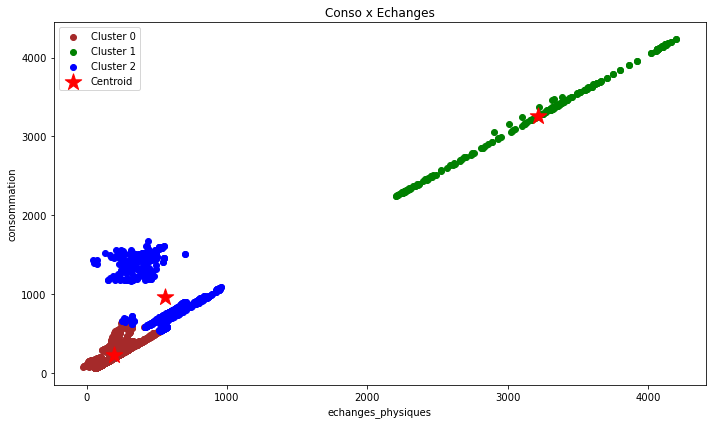

In [ ]:
# Affichage des clusters 
plt.figure(figsize=(10,6))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'brown', label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'blue', label = 'Cluster 2')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'red', label = 'Centroid', marker='*')

plt.xlabel('echanges_physiques')
plt.ylabel('consommation')
plt.legend()
plt.title('Conso x Echanges') 

# le nombre de clusters dans notre étude est optimal (k = 3 groupes)

In [ ]:
X = data[['echanges_physiques']] ##### Prédictrices

# affichage des 5 premières lignes
X.head() 

,echanges_physiques
0,4078.0
1,692.0
2,320.0
3,181.0
4,83.0


In [ ]:
# vérifier le type et la forme de X
print(type(X))
print(X.shape) # 4535 lignes

<class 'pandas.core.frame.DataFrame'>
(4535, 1)


In [ ]:
# sélectionner une série dans le DataFrame
Y = data['consommation'] #### Target --> définition

## commande équivalente qui fonctionne s'il n'y a pas d'espace dans le nom de la colonne
Y = data.consommation

# affichage des 5 premières lignes
Y.head()

0    4122.0
1     896.0
2     723.0
3     183.0
4     183.0
Name: consommation, dtype: float64

In [ ]:
# vérifier le type et la forme de Y
print(type(Y))
print(Y.shape) # 4535 lignes

<class 'pandas.core.series.Series'>
(4535,)


In [ ]:
from sklearn.model_selection import train_test_split ### Séparer les individus en ensemble de train et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 1) 
##### 75% pour le train et 25% pour le test 
####  Argument (Prédictrices, target, tirage aléatoire des données dans X et y (reproductible), taille du jeu de test 20%)

In [ ]:
X_train.head(5)

,echanges_physiques
546,651.0
262,362.0
1163,180.0
3079,386.0
2734,185.0


In [ ]:
X_train.shape

(3401, 1)

In [ ]:
####Séparation des data en 2 --> Train et test

X_train.head(5)

,echanges_physiques
546,651.0
262,362.0
1163,180.0
3079,386.0
2734,185.0


In [ ]:
X_train.tail(5)

,echanges_physiques
2895,236.0
2763,277.0
905,699.0
3980,426.0
235,269.0


In [ ]:
X_train.shape ####75% de 200 ie 150 observations

(3401, 1)

In [ ]:
X_test.shape

(1134, 1)

In [ ]:
Y_test.shape

(1134,)

In [ ]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(3401, 1)
(3401,)
(1134, 1)
(1134,)


In [ ]:
X_train.head()

,echanges_physiques
546,651.0
262,362.0
1163,180.0
3079,386.0
2734,185.0
